# Decision analysis with `rdecision` using Petitti, 2000, 2e. - Chapter 2  - Part 2
Tomás Aragón, Updated 2026-01-14

Chapter 2 from Petitti, Diana B. Meta-Analysis, Decision Analysis, and Cost-Effectiveness Analysis: Methods for Quantitative Synthesis in Medicine. 2nd ed. Monographs in Epidemiology and Biostatistics, v. 31. Oxford University Press, 2000. https://doi.org/10.1093/acprof:oso/9780195133646.001.0001.

This R Jupyter notebook was created in VS Code and contains examples from Petitti 2000, Chapter 2 using R code.

If you are not already using R in VS Code, then use Positron from Posit (https://positron.posit.co/). Positron is a free IDE for data science designed to support Python and R (Julia works too). Positron is built on the same open-source foundation as Visual Studio Code (VS Code).   

We will use `rdecision` R package: https://cran.r-project.org/web/packages/rdecision/index.html

The `rdecision` CRAN page has links to several vignettes using health decision analysis examples.

## Part 2 
[Part 1 shows how to construct a decision tree](https://github.com/tomasaragon/di4h/blob/main/nb/Petitti2000/NB_R_rdecision_part1.ipynb) using `rdecision` R package. Part 2 continues with a more complex example from Petitti 2000, Chapter 2. 

Yeah! We can see how simple it is to create decision trees using `rdecision` package.

## Decision analysis: Re-vaccinate for measles? (Figures 2-2 to 2-6)

Figure 2-2 shows the beginning of a decision tree for the problem of whether or not to recommend measles revaccination of children 8 to 15. The square decision node at the left of the diagram represents the decision; the alternative courses of action—to recommend revaccination or not to recommend revaccination—are labeled on the horizontal portions of the branches.

<img src="Petitti_2000_2e_ch02_fig2-2.png" width="400" alt="Petitti 2000 Figure 2-2"/>

Figure 2-3 is a decision tree for the measles revaccination problem. The circular chance nodes identify the first event that follows the decision to revaccinate—either children are exposed to measles or they are not exposed to measles. This event is out of the control of the decision maker. The sum of the probabilities of being exposed or not being exposed to measles is 1.

<img src="Petitti_2000_2e_ch02_fig2-3.png" width="600" alt="Petitti 2000 Figure 2-3"/>

Figure 2-4 is a decision tree for the measles problem with circular chance nodes to also identify events that follow the exposure to measles. Children exposed to measles either get measles or they do not get measles. Again, this is an event that is out of the control of the decision maker, and it is depicted by a chance node. The sum of the probabilities of getting or not getting measles is 1.

<img src="Petitti_2000_2e_ch02_fig2-4.png" width="600" alt="Petitti 2000 Figure 2-4"/>

The rectangular boxes in Figure 2-5 identify the outcome of getting and of not getting measles. For this example, the outcomes of interest are death or nondeath from measles.

<img src="Petitti_2000_2e_ch02_fig2-5.png" width="800" alt="Petitti 2000 Figure 2-5"/>

### 2.2.5 Analyzing the Decision Tree
The decision tree is analyzed by a process called folding back and averaging. The final result is an estimate of the probability of the expected outcome of each of the decision alternatives.

<img src="Petitti_2000_2e_ch02_fig2-6.png" width="800" alt="Petitti 2000 Figure 2-6"/>


Moving from left to right and top to bottom I label the nodes and edges as follows:
- d1, etc. for one or more decision nodes
- c1, c2, etc. for chance nodes
- e1, e2, etc. for edges (actions or reactions)
- t1, t2, etc. for terminal (leaf) nodes

This makes writing and following the R code easier.

Figure 2-6 is displayed below, but now with my labels (d1, c1, e1, t1, etc.) added.

<img src="Petitti_2000_2e_ch02_fig2-6_annotated.png" width="800" alt="Petitti 2000 Figure 2-6"/>

In the R code below, I use `d01`, `c01`, `t01`, etc. instead of `d1`, `c1`, `t1`, etc. to ensure `rdecision` draws the identical tree as in Petitti 2000 Figure 2-1. This ensures appropriate alphabetical ordering.  

In [1]:
library(rdecision)

In [ ]:
# create all nodes first
## terminal nodes
t01 = LeafNode$new("dead (t01)", utility = 0)
t02 = LeafNode$new("well (t02)", utility = 1)
t03 = LeafNode$new("dead (t03)", utility = 0) 
t04 = LeafNode$new("well (t04)", utility = 1)
t05 = LeafNode$new("dead (t05)", utility = 0)
t06 = LeafNode$new("well (t06)", utility = 1)
t07 = LeafNode$new("dead (t07)", utility = 0) 
t08 = LeafNode$new("well (t08)", utility = 1)
t09 = LeafNode$new("dead (t09)", utility = 0)
t10 = LeafNode$new("well (t10)", utility = 1)
t11 = LeafNode$new("dead (t11)", utility = 0) 
t12 = LeafNode$new("well (t12)", utility = 1)
t13 = LeafNode$new("dead (t13)", utility = 0)
t14 = LeafNode$new("well (t14)", utility = 1)
t15 = LeafNode$new("dead (t15)", utility = 0) 
t16 = LeafNode$new("well (t16)", utility = 1)

## chance nodes
c01 = ChanceNode$new("Exposure (c01)")
c02 = ChanceNode$new("Exposure (c02)")

c03 = ChanceNode$new("Infection (c03)")
c04 = ChanceNode$new("Infection (c04)")
c05 = ChanceNode$new("Infection (c05)")
c06 = ChanceNode$new("Infection (c06)")

c07 = ChanceNode$new("Status (c07)")
c08 = ChanceNode$new("Status (c08)")
c09 = ChanceNode$new("Status (c09)")
c10 = ChanceNode$new("Status (c10)")
c11 = ChanceNode$new("Status (c11)")
c12 = ChanceNode$new("Status (c12)")
c13 = ChanceNode$new("Status (c13)")
c14 = ChanceNode$new("Status (c14)")

## decision node
d01  = DecisionNode$new("Decision Node (d01)")

# create edges after nodes
## edges
e01 = Action$new(d01, c01, label = "Re-vaccinate (e01)")
e02 = Action$new(d01, c02, label = "Don't Re-vaccinate (e02)")

e03 = Reaction$new(c01, c03, p = 0.20, label = "Exposed (e03)")
e04 = Reaction$new(c01, c04, p = 0.80, label = "Not Exposed (e04)")
e05 = Reaction$new(c02, c05, p = 0.20, label = "Exposed (e05)")
e06 = Reaction$new(c02, c06, p = 0.80, label = "Not Exposed (e06)")

e07 = Reaction$new(c03, c07, p = 0.05, label = "Measles (e07)")
e08 = Reaction$new(c03, c08, p = 0.95, label = "No measles (e08)")
e09 = Reaction$new(c04, c09, p = 0.00, label = "Measles (e09)")
e10 = Reaction$new(c04, c10, p = 1.00, label = "No measles (e10)")
e11 = Reaction$new(c05, c11, p = 0.33, label = "Measles (e11)")
e12 = Reaction$new(c05, c12, p = 0.67, label = "No measles (e12)")
e13 = Reaction$new(c06, c13, p = 0.00, label = "Measles (e13)")
e14 = Reaction$new(c06, c14, p = 1.00, label = "No measles (e14)")

e15 = Reaction$new(c07, t01, p = 0.0023, label = "Die (e15)")
e16 = Reaction$new(c07, t02, p = 0.9977, label = "Live (e16)")
e17 = Reaction$new(c08, t03, p = 0.0, label = "Die (e17)")
e18 = Reaction$new(c08, t04, p = 1.0, label = "Live (e18)")
e19 = Reaction$new(c09, t05, p = 0.0023, label = "Die (e19)")
e20 = Reaction$new(c09, t06, p = 0.9977, label = "Live (e20)")
e21 = Reaction$new(c10, t07, p = 0.0, label = "Die (e21)")
e22 = Reaction$new(c10, t08, p = 1.0, label = "Live (e22)")
e23 = Reaction$new(c11, t09, p = 0.0023, label = "Die (e23)")
e24 = Reaction$new(c11, t10, p = 0.9977, label = "Live (e24)")
e25 = Reaction$new(c12, t11, p = 0.0, label = "Die (e25)")
e26 = Reaction$new(c12, t12, p = 1.0, label = "Live (e26)")
e27 = Reaction$new(c13, t13, p = 0.0023, label = "Die (e27)")
e28 = Reaction$new(c13, t14, p = 0.9977, label = "Live (e28)")
e29 = Reaction$new(c14, t15, p = 0.0, label = "Die (e29)")
e30 = Reaction$new(c14, t16, p = 1.0, label = "Live (e30)")

# create lists of nodes (aka, vertices) and edges
V = list(
  d01,
  c01, c02,
  c03, c04, c05, c06,
  c07, c08, c09, c10, c11, c12, c13, c14,
  t01, t02, t03, t04, t05, t06, t07, t08,
  t09, t10, t11, t12, t13, t14, t15, t16
)
E = list(
  e01, e02,
  e03, e04, e05, e06,
  e07, e08, e09, e10, e11, e12, e13, e14,
  e15, e16, e17, e18, e19, e20,
  e21, e22, e23, e24, e25, e26,
  e27, e28, e29, e30
)

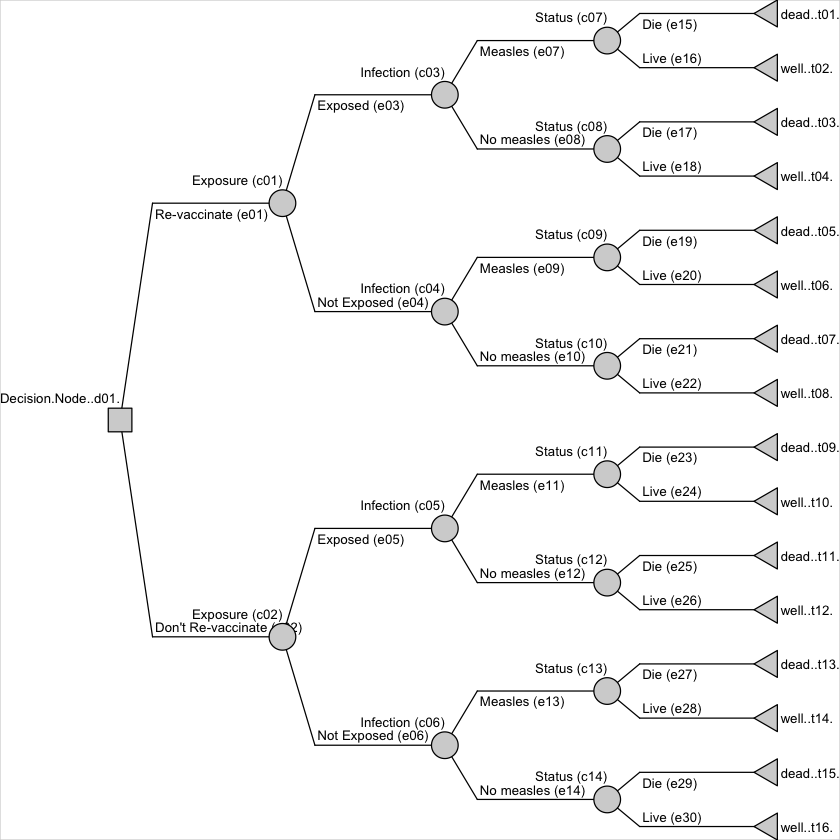

In [3]:
# tree
dt = DecisionTree$new(V, E)
dt$draw(border = TRUE)

In [4]:
result = dt$evaluate()
result

Run,Decision.Node..d01.,Probability,Cost,Benefit,Utility,QALY
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Don't Re-vaccinate (e02),1,0,0,0.9998482,0.9998482
1,Re-vaccinate (e01),1,0,0,0.9999770,0.9999770


In [5]:
# calculate risk difference as on pp. 27-28
risk_death_no_revax = 1 - result$Utility[1]
risk_death_revax = 1 - result$Utility[2]
risk_difference = risk_death_no_revax - risk_death_revax
round(risk_difference, digits = 6)


[1] 0.000129

From pp. 27-28: "The difference in the expected probability of death from measles between a strategy of revaccination and a strategy of no-revaccination is


`0.000152 − 0.000023 = 0.000129`

This is interpreted to mean that 12.9 deaths from measles are prevented per 100,000 children revaccinated."

In [6]:
dt$evaluate(by = "path")

Run,Decision.Node..d01.,Leaf,Probability,Cost,Benefit,Utility,QALY
<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Don't Re-vaccinate (e02),dead..t09.,0.0001518,0,0,0.0000000,0.0000000
1,Don't Re-vaccinate (e02),dead..t11.,0.0000000,0,0,0.0000000,0.0000000
1,Don't Re-vaccinate (e02),dead..t13.,0.0000000,0,0,0.0000000,0.0000000
1,Don't Re-vaccinate (e02),dead..t15.,0.0000000,0,0,0.0000000,0.0000000
1,Don't Re-vaccinate (e02),well..t10.,0.0658482,0,0,0.0658482,0.0658482
1,Don't Re-vaccinate (e02),well..t12.,0.1340000,0,0,0.1340000,0.1340000
1,Don't Re-vaccinate (e02),well..t14.,0.0000000,0,0,0.0000000,0.0000000
1,Don't Re-vaccinate (e02),well..t16.,0.8000000,0,0,0.8000000,0.8000000
1,Re-vaccinate (e01),dead..t01.,0.0000230,0,0,0.0000000,0.0000000


Figure 2-1 output enlarged.

<img src="img_Petitti_2000_Chap2_Fig2-1.png" width="800" alt="Petitti 2000 Figure 2-6"/>